# Machine Learning Programming Exercise 1: Linear Regression

In [1]:
#import package(s)
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

## 1 Simple Function
Create a function that returns a 5 by 5 identity matrix.

In [2]:
#define function for exercise(s)
def warmUpExercise():
#    WARMUPEXERCISE Example function in octave
#    A = WARMUPEXERCISE() is an example function that returns the 5x5 identity matrix
    return np.identity(5)

# ==================== Part 1: Basic Function ====================
#Complete warmUpExercise
print('Running warmUpExercise ...')
print('5x5 Identity Matrix: ')
warmUpExercise()

Running warmUpExercise ...
5x5 Identity Matrix: 


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 2 Linear regression with one variable

This part of the exercise implements linear regression with one variable to predict proﬁts for a food truck. Suppose a CEO of a restaurant franchise is considering diﬀerent cities for opening a new outlet. The chain already has trucks in various cities and you have data for proﬁts and populations from the cities. You would like to use this data to help you select which city to expand to next. 

The ﬁle ex1data1.txt contains the dataset for our linear regression problem. The ﬁrst column is the population of a city and the second column is the proﬁt of a food truck in that city. A negative value for proﬁt indicates a loss. 

<div class="alert alert-block alert-info">
<b>Note:</b> 
    Despite its name, linear regression can fit data that is nonlinear, but it might not be able to model the specific curve that exists in your data. The model in linear regression has to be linear in the $\theta$ (regressors) terms.
    
Regression problems like this one will predict a real-value (continous) for the output. 
</div>

### 2.1 Plotting the Data

The data is visualized with a scatter plot to understand the relationship between profit and population. (Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.) 

Plotting Data ...


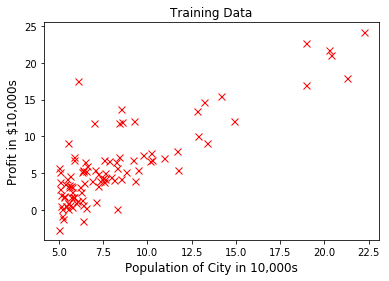

In [3]:
#define function for exercise(s)
def plotData(x, y):
#    PLOTDATA Plots the data points x and y into a new figure #
#    PLOTDATA(x,y) plots the data points and gives the figure axes labels of population and profit.
    plt.figure()
    plt.plot(x,y,'rx',markersize=7)
    plt.ylabel('Profit in $10,000s', fontsize=12)
    plt.xlabel('Population of City in 10,000s', fontsize=12)
    
# ======================= Part 2: Plotting =======================
print('Plotting Data ...')
#load txt file
data = loadtxt('ex1data1.txt',delimiter = ",")
#get all of the rows in the first column (population size)
X = data[:,0] 
#get all of the rows in the second column (profit)
y = data[:,1]
#number of training examples
m = len(y)


# Plot Data
# Note: You have to complete the code in plotData.m
plotData(X,y)
plt.title('Training Data')
plt.show()

There seems to be a linear relationship between profit and population. It would make sense to fit a line to the data. 

### 2.2 Gradient Descent
Gradient descent will find the $\theta$ parameters for the linear regression model, $h_{\theta} (x) = \theta^T x = \theta_0 + \theta_1 x_1$, that best fits the dataset. There are many different forms of linear regression models, but this dataset has one feature and so it is appropriate to use linear regression for one variable.

The goal is to minimize the cost function, $\begin{align*}J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_{\theta} (x^{(i)}) - y^{(i)})^2 \end{align*}$, by updating the $\theta$ parameters iteratively using
$\begin{align*} \theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^m (h_{\theta} (x^{(i)}) - y^{(i)})x_j^{(i)} \end{align*}$ until the values stop changing. That is, the parameters are updated as each step is taken in the direction of the negative gradient (slope). This descent continues until the bottom of the graph is reached as illustrated below.
[Image source](https://www.youtube.com/watch?v=5u0jaA3qAGk&feature=youtu.be)

![gradient_descent_demystified.png](gradient_descent_demystified.png)


We add a column of ones to $X$ to represent $x_0$. The linear algebra works out as so 
$ h_{\theta} (x) = \theta^T x = \begin{bmatrix}
       \theta_0  & \theta_1          
     \end{bmatrix} \begin{bmatrix}
       x_0           \\
       x_1  
       \end{bmatrix}
   = \begin{bmatrix}
       \theta_0  & \theta_1          
     \end{bmatrix} \begin{bmatrix}
       \vec{1} \\
       x_1          
     \end{bmatrix}  = \theta_0 + \theta_1 x_1 $.
     
<div class="alert alert-block alert-info">
<b>Implementation Note:</b> We store each example as a row in the the X matrix. To take into account the intercept term ($\theta_0$), we add an additional ﬁrst column to X and set it to all ones. This allows us to treat $\theta_0$ as simply another ‘feature’.
</div>
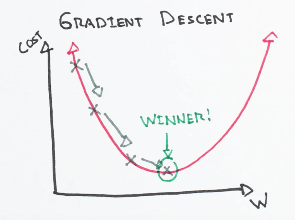

Testing the cost function ...
With theta = [0 ; 0]
Cost computed =  32.072733877455676
Expected cost value (approx) 32.07
With theta = [-1 ; 2]
Cost computed =  54.24245508201238
Expected cost value (approx) 54.24

Running Gradient Descent ...
Theta found by gradient descent: [[-3.63606348]
 [ 1.16698916]]
Expected theta values (approx)
 -3.6303
  1.1664


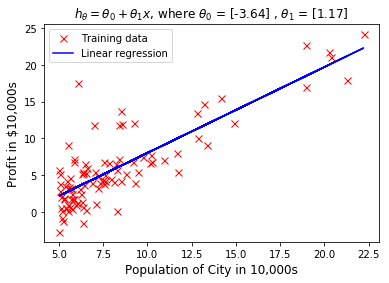

For population = 35,000, we predict a profit of [[4483.98578098]]
For population = 70,000, we predict a profit of [[45328.60631675]]


In [4]:
#define function for exercise(s)
def hyp(theta,X):
#    Calculates the hypothesis function
#    X is size m training examples by n features
#    theta is size n features by one
    return np.dot(theta.T,X.T)

def computeCost(X,y,theta):
#   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
#   parameter for linear regression to fit the data points in X and y

    return np.average(np.square(y-hyp(theta,X)))/2
#
def gradientDescent(X,y,theta,alpha,num_iters):
#    GRADIENTDESCENT Performs gradient descent to learn theta
#    theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
#    taking num_iters gradient steps with learning rate alpha
    J_history = np.zeros((num_iters,1))
    theta_history = np.zeros((theta.shape[0],num_iters))
    for j in range(num_iters):
        for i in range(len(theta)):
            theta_history[i,j] = theta[i,:]
            theta[i,:] = theta[i,:] - alpha*np.average((hyp(theta,X)-y)*X[:,i])
        J_history[j] = computeCost(X, y, theta)
    return theta, J_history, theta_history

# =================== Part 3: Cost and Gradient descent ===================
#Add a column of ones to x
X = np.column_stack((np.ones((m,1)), data[:,0]))

#initialize fitting parameters
theta = np.zeros((2,1))

#Some gradient descent settings
iterations = 1500
alpha = 0.01

print('Testing the cost function ...')
#compute and display initial cost
J = computeCost(X, y, theta)
print('With theta = [0 ; 0]\nCost computed = ', J)
print('Expected cost value (approx) 32.07')

# further testing of the cost function
J = computeCost(X, y, np.matrix('-1; 2'))
print('With theta = [-1 ; 2]\nCost computed = ', J)
print('Expected cost value (approx) 54.24')

print('\nRunning Gradient Descent ...')
#run gradient descent
theta, J_history, theta_history = gradientDescent(X, y, theta, alpha, iterations)

#print theta to screen
print('Theta found by gradient descent:', theta)
print('Expected theta values (approx)')
print(' -3.6303\n  1.1664')

#Plot the linear fit
plotData(X[:,1],y)
plt.plot(X[:,1],np.dot(X,theta),'b')
plt.legend(["Training data", "Linear regression"])
plt.title(r'$h_{\theta} =\theta_0 + \theta_1 x$, where $\theta_0$ = %s , $\theta_1 $ = %s' 
          % (np.round(theta[0],2),np.round(theta[1],2)))
plt.show()

#Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot(np.matrix('1, 3.5'),theta)
print('For population = 35,000, we predict a profit of', predict1*10000)
predict2 = np.dot(np.matrix('1, 7'),theta)
print('For population = 70,000, we predict a profit of', predict2*10000)

### 2.4 Visualizing $J(\theta)$
To see how the cost function $J(\theta)$ varies, we plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values.

The surface plot shows that the cost function is convex or bowl-shaped which means that $J(\theta)$ has local minima. In fact, it has a global minimum, $(-3.6303, 1.1664)$.

Visualizing J(theta_0, theta_1) ...


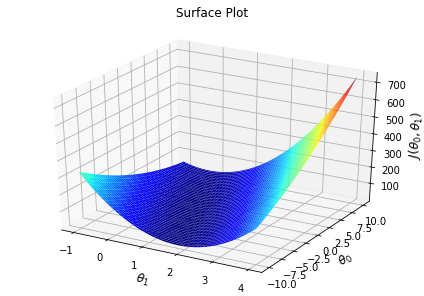

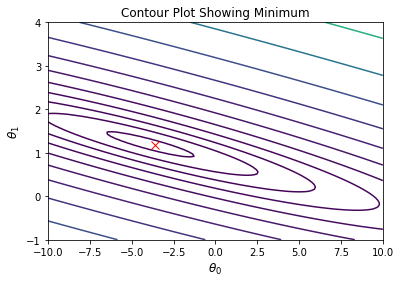

In [5]:
#define function for exercise(s)
def J_plot(theta0_vals,theta1_vals,X,y):
#    Calculates cost function values for 3d plots
#   initialize J_vals to a matrix of 0's
    J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

#   Fill out J_vals
    for i in range(len(theta0_vals)):
        for j in range(len(theta1_vals)):
            t = np.matrix([[theta0_vals[i]], [theta1_vals[j]]])
            J_vals[i,j] = computeCost(X, y, t)
    return J_vals

# ============= Part 4: Visualizing J(theta_0, theta_1) =============
print('Visualizing J(theta_0, theta_1) ...')

#Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

#get cost function values for 3d plots
Jplt = J_plot(theta0_vals,theta1_vals,X,y) 

#Surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')
T1, T0 = np.meshgrid(theta1_vals, theta0_vals)
ax.plot_surface(T1, T0, Jplt, cmap=cm.jet)
#invert x axis to match contour plot in ex1.pdf
#plt.gca().invert_xaxis()
ax.set_xlabel(r'$\theta_1$',fontsize=12)
ax.set_ylabel(r'$\theta_0$',fontsize=12)
ax.set_zlabel(r'$J(\theta_0, \theta_1)$',fontsize=12)
plt.tight_layout()
ax.set_title('Surface Plot')
plt.show()

#Contour plot
#Plot J_vals as 20 contours spaced logarithmically between -2 and 3
plt.figure()
contours = plt.contour(T0, T1, Jplt, np.logspace(-2, 3, 25))
plt.plot(theta[0],theta[1],'rx',markersize=8)
plt.ylabel(r'$\theta_1$',fontsize=12)
plt.xlabel(r'$\theta_0$',fontsize=12)
plt.title('Contour Plot Showing Minimum')
plt.show()

## Additional Plots
Some values from theta_history are shown on the contour plot. This gives us the idea of the steps taken in gradient descent to reach the global minimum from the starting point, $(0,0)$.

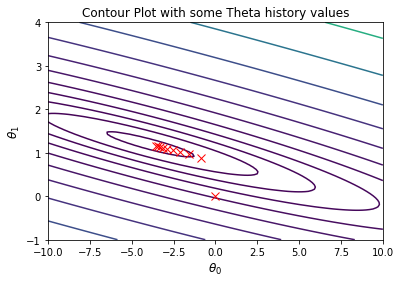

In [6]:
plt.figure()
contours = plt.contour(T0, T1, Jplt, np.logspace(-2, 3, 25))
for i in range(0, iterations, 150):
    plt.plot(theta_history[0,i],theta_history[1,i],'rx',markersize=8)
plt.ylabel(r'$\theta_1$',fontsize=12)
plt.xlabel(r'$\theta_0$',fontsize=12)
plt.title('Contour Plot with some Theta history values')
plt.show()

Below is a plot of the cost function values at the given learning rate, $\alpha$. We see that it decreases at each iteration.

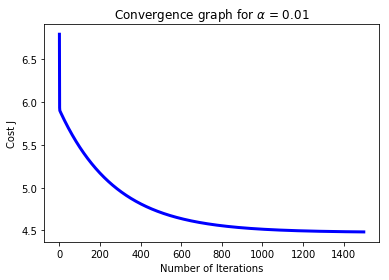

In [7]:
it_vec = range(np.size(J_history))
plt.figure()
plt.plot(it_vec, J_history, 'b', linewidth=3.0)
plt.ylabel('Cost J')
plt.xlabel('Number of Iterations')
plt.title(r'Convergence graph for $\alpha$ = %s' % alpha)
plt.show()